In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline # to display Matplotlib plots directly within the notebook interface.

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.shape

(400, 5)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0
399,15594041,Female,49.0,36000.0,1


In [6]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [7]:
df.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [8]:
df.dtypes

User ID              int64
Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


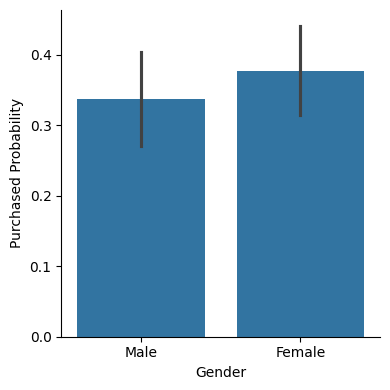

In [11]:
g = sns.catplot (x = "Gender", y = "Purchased", data = df, kind = "bar", height = 4)
g.set_ylabels("Purchased Probability")

Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


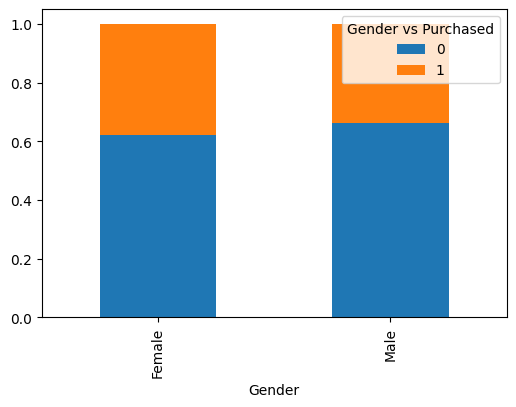

In [12]:
M2 = pd.crosstab(df['Gender'], df['Purchased'], normalize="index")
print(M2)

# Plotting the stacked bar chart
M2.plot.bar(figsize=(6, 4), stacked=True)
plt.legend(title="Gender vs Purchased", loc="upper right") 
plt.show()

(6, 6)


<Axes: >

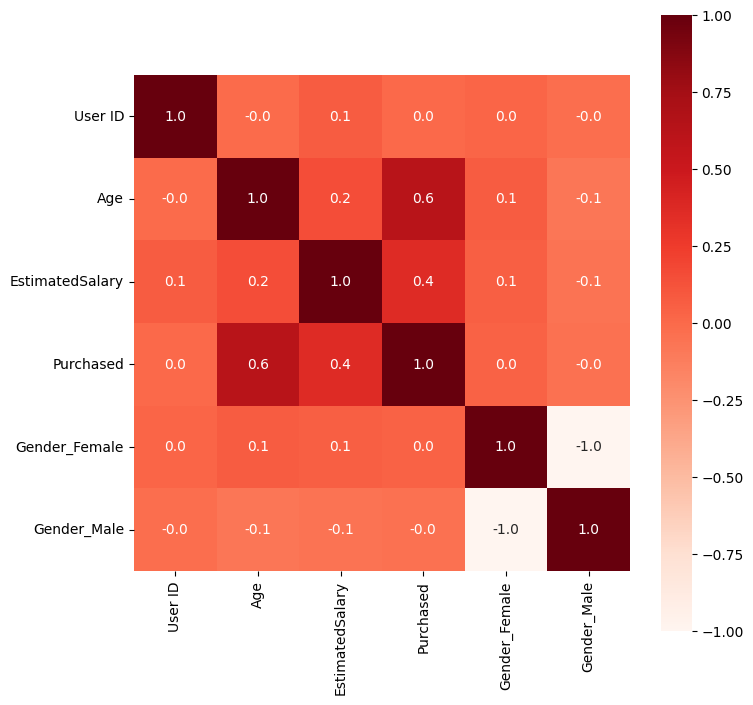

In [22]:
# Assuming df is your DataFrame containing the data
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

# Assuming df is your DataFrame containing the data
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df)
corr = df_encoded.corr()
print(corr.shape)
plt.figure(figsize = (8,8))
sns.heatmap(corr, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':10}, cmap = 'Reds')


In [23]:
X = df.drop(['Gender', 'Purchased'], axis = 1)
Y = df['Purchased']
X.head()

,User ID,Age,EstimatedSalary
0,15624510,19.0,19000.0
1,15810944,35.0,20000.0
2,15668575,26.0,43000.0
3,15603246,27.0,57000.0
4,15804002,19.0,76000.0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2, random_state = 42)
print("Training and testing split was succesful")

Training and testing split was succesful


In [25]:
from sklearn.linear_model import LogisticRegression
basemodel = LogisticRegression()
basemodel.fit(X_train, Y_train)
print("Training Accuracy: ", basemodel.score(X_train, Y_train) * 100)

Training Accuracy:  78.75


In [26]:
Y_predict = basemodel.predict(X_test)
print("Testing accuracy: ", basemodel.score(X_test, Y_test) * 100)

Testing accuracy:  73.75


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
X = df[['Age', 'EstimatedSalary']]
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)
print("Training and testing and split was successful")

Training and testing and split was successful


In [32]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
print("Training accuracy: ", model.score(X_train, Y_train) * 100)
print("Testing accuracy: ", model.score(X_test, Y_test) * 100)

Training accuracy:  80.9375
Testing accuracy:  87.5


In [33]:
from sklearn.metrics import precision_recall_fscore_support 
prf = precision_recall_fscore_support(Y_test, Y_predict)

print("precision: ", prf[0])
print("Recall: ", prf[1])
print("Fscore: ", prf[2])
print("Support: ", prf[3])

precision:  [0.85 0.95]
Recall:  [0.98076923 0.67857143]
Fscore:  [0.91071429 0.79166667]
Support:  [52 28]


In [34]:
from sklearn.metrics import classification_report
cr = classification_report(Y_test, Y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80



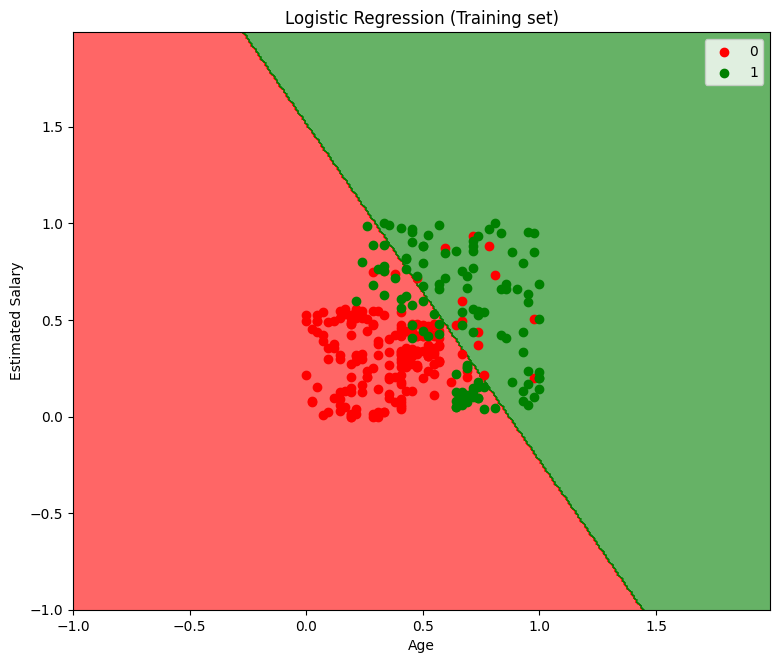

In [36]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap

# Assuming X_train and Y_train are your training features and labels, respectively
X_set, y_set = X_train, Y_train

# Create a meshgrid for plotting decision boundaries
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.figure(figsize=(9, 7.5))

# Plot the decision boundary
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.6, cmap=ListedColormap(('red', 'green')))

# Plot the training data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


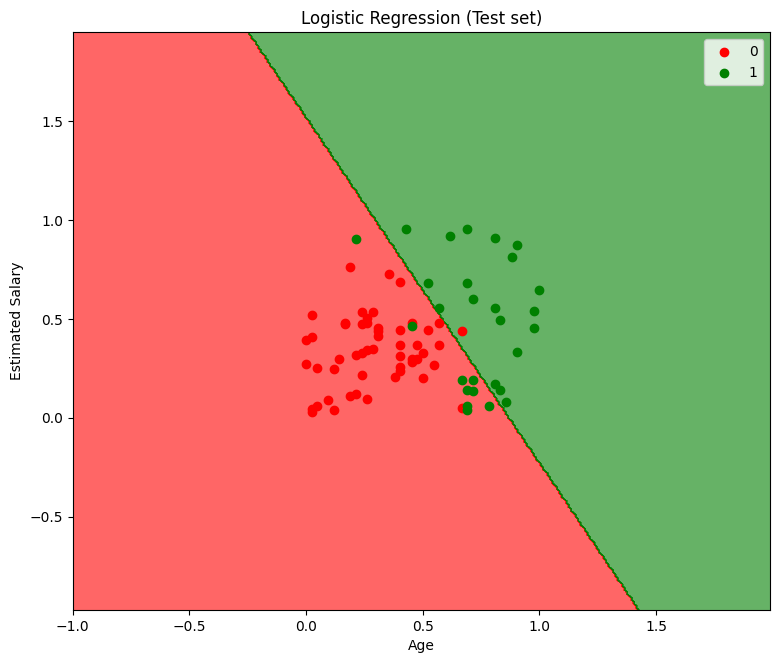

In [38]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap

# Assuming X_test and Y_test are your test features and labels, respectively
X_set, y_set = X_test, Y_test

# Create a meshgrid for plotting decision boundaries
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.figure(figsize=(9, 7.5))

# Plot the decision boundary
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.6, cmap=ListedColormap(('red', 'green')))

# Plot the test data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Regression Line Tracing')

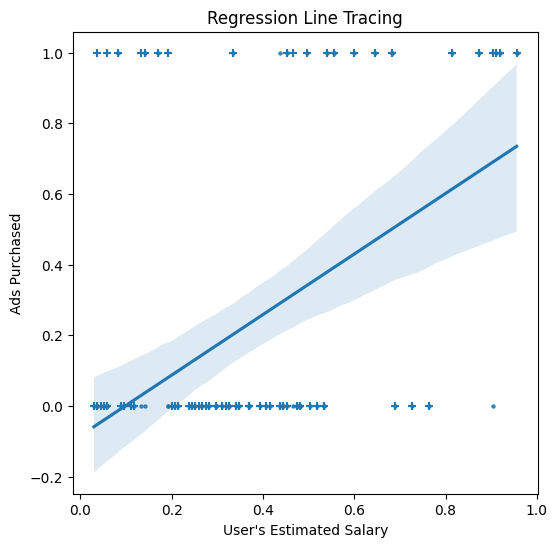

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0, solver='lbfgs' )
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
plt.figure(figsize=(6, 6))
sns.regplot(x = X_test[:, 1], y = predictions, scatter_kws={'s':5})
plt.scatter(X_test[:, 1], Y_test, marker = '+')
plt.xlabel("User's Estimated Salary")
plt.ylabel('Ads Purchased')
plt.title('Regression Line Tracing')